In [9]:
import numpy as np
import pandas as pd

In [5]:
def simulate_regime_switching_vars(n_samples1, n_samples2, dim, B, Sigma1, Sigma2, seed=None):
    """
    Simulate samples from two VAR(1) models with shared coefficient matrix but different covariances.
    
    Parameters:
    -----------
    n_samples1 : int
        Number of samples to generate from first VAR model
    n_samples2 : int
        Number of samples to generate from second VAR model
    dim : int
        Dimension of the VAR processes
    B : numpy.ndarray
        (dim, dim) coefficient matrix shared between both VARs
    Sigma1 : numpy.ndarray
        (dim, dim) covariance matrix for first VAR
    Sigma2 : numpy.ndarray
        (dim, dim) covariance matrix for second VAR
    seed : int, optional
        Random seed for reproducibility
    
    Returns:
    --------
    tuple
        (samples1, samples2) where each is a (n_samples, dim) array of VAR realizations
    """
    if seed is not None:
        np.random.seed(seed)
        
    # Input validation
    if not (B.shape == (dim, dim) and Sigma1.shape == (dim, dim) and Sigma2.shape == (dim, dim)):
        raise ValueError("Dimension mismatch in input matrices")
    
    # Check stability condition
    eigenvals = np.linalg.eigvals(B)
    if np.any(np.abs(eigenvals) >= 1):
        raise ValueError("VAR process is not stable (eigenvalues >= 1)")
    
    # Generate samples for first VAR
    samples1 = np.zeros((n_samples1, dim))
    noise1 = np.random.multivariate_normal(np.zeros(dim), Sigma1, size=n_samples1)
    
    for t in range(1, n_samples1):
        samples1[t] = B @ samples1[t-1] + noise1[t]
    
    # Generate samples for second VAR
    samples2 = np.zeros((n_samples2, dim))
    noise2 = np.random.multivariate_normal(np.zeros(dim), Sigma2, size=n_samples2)
    
    for t in range(1, n_samples2):
        samples2[t] = B @ samples2[t-1] + noise2[t]
        
    return samples1, samples2

In [26]:
# Set parameters
dim = 2
n_samples1 = (30 * 12) * 10
n_samples2 = (30 * 1) * 10

# Define shared coefficient matrix (must have eigenvalues < 1 for stationarity)
B = np.array([[0.5, 0.2],
              [0.1, 0.3]])

# Define different covariance matrices
Sigma1 = np.array([[1.0, 0.3],
                    [0.3, 1.0]])
Sigma2 = np.array([[1.0, 0.3],
                   [0.3, 1.0]])

# Generate samples
mts1, mts2 = simulate_regime_switching_vars(n_samples1, n_samples2, dim, B, Sigma1, Sigma2, seed=42)

data = pd.DataFrame(mts1, columns=['feature1', 'feature2'])
data = pd.concat([data, pd.DataFrame(mts2, columns=['feature1', 'feature2'])], axis=0).reset_index(drop=True)

<Axes: title={'center': 'Simulated VAR(1) Regime Switching Data'}>

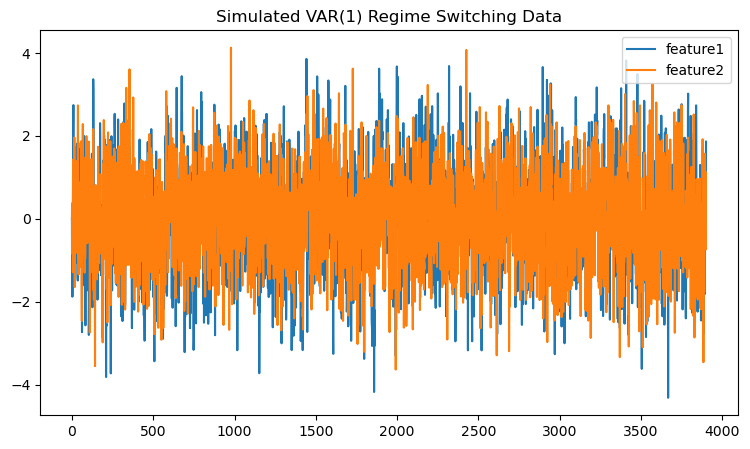

In [27]:
data.plot(figsize=(9, 5), title="Simulated VAR(1) Regime Switching Data")